# Strategie ewolucyjne

Notebook pokazuje podstawowe mechanizmy strategii ewolucyjnych.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

%matplotlib inline

## Przykładowe problemy testowe

In [4]:
# Sphere function (minimum at 0)
def objective_function_F1(X):
    return - np.sum(X**2, axis=1)

# Sphere function - modified
def objective_function_F1a(X):
    return - (X[:, 0]**2 + 9*X[:, 1]**2)

# Sphere function - modified
def objective_function_F1b(X):
    return - (X[:, 0]**2 + 625*X[:, 1]**2)

# Sphere function - modified
def objective_function_F1c(X):
    return - (X[:, 0]**2 + 2*X[:, 1]**2 - 2 * X[:, 0] * X[:, 1])

In [5]:
# Rastrigin function (minimum at 0)
def objective_function_F6(X):
    return - 10.0 * X.shape[1] - np.sum(X**2, axis=1) + 10.0 * np.sum(np.cos(2 * np.pi * X), axis=1)

In [6]:
# Schwefel function (minimum at 420.9687)
# (REMARK: should be considered only on [-500, 500]^d, because there are better minima outside)
def objective_function_F7(X):
    return - 418.9829 * X.shape[1] + np.sum(X * np.sin(np.sqrt(np.abs(X))), axis=1)

In [7]:
# Griewank function (minimum at 0)
def objective_function_F8(X):
    return - 1 - np.sum(X**2 / 4000, axis=1) + np.prod(np.cos(X / np.sqrt(np.linspace(1, X.shape[1], X.shape[1]))), axis=1)

## Przykładowe modele mutacji

In [54]:
from matplotlib.patches import Ellipse

def plot_point_cov(points, pos, nstd=2, ax=None, **kwargs):
    """
    Plots an `nstd` sigma ellipse based on the mean and covariance of a point
    "cloud" (points, an Nx2 array).

    Parameters
    ----------
        points : An Nx2 array of the data points.
        nstd : The radius of the ellipse in numbers of standard deviations.
            Defaults to 2 standard deviations.
        ax : The axis that the ellipse will be plotted on. Defaults to the 
            current axis.
        Additional keyword arguments are pass on to the ellipse patch.

    Returns
    -------
        A matplotlib ellipse artist
    """
    cov = np.cov(points, rowvar=False)
    return plot_cov_ellipse(cov, pos, nstd, ax, **kwargs)

def plot_cov_ellipse(cov, pos, nstd=2, ax=None, **kwargs):
    """
    Plots an `nstd` sigma error ellipse based on the specified covariance
    matrix (`cov`). Additional keyword arguments are passed on to the 
    ellipse patch artist.

    Parameters
    ----------
        cov : The 2x2 covariance matrix to base the ellipse on
        pos : The location of the center of the ellipse. Expects a 2-element
            sequence of [x0, y0].
        nstd : The radius of the ellipse in numbers of standard deviations.
            Defaults to 2 standard deviations.
        ax : The axis that the ellipse will be plotted on. Defaults to the 
            current axis.
        Additional keyword arguments are pass on to the ellipse patch.

    Returns
    -------
        A matplotlib ellipse artist
    """
    def eigsorted(cov):
        vals, vecs = np.linalg.eigh(cov)
        order = vals.argsort()[::-1]
        return vals[order], vecs[:,order]

    if ax is None:
        ax = plt.gca()

    vals, vecs = eigsorted(cov)
    theta = np.degrees(np.arctan2(*vecs[:,0][::-1]))

    # Width and height are "full" widths, not radius
    width, height = 2 * nstd * np.sqrt(vals)
    print("WIDTH OF ELIPSE: " + str(width))
    print("HEIGHT OF ELIPSE: " + str(height))
    ellip = Ellipse(xy=pos, width=width, height=height, angle=theta, **kwargs)

    ax.add_artist(ellip)
    return ellip

In [47]:
N = 250
d = 2
reps = 1000

objective_function = objective_function_F1

original_individual = np.array([[1, 1]])

#### Notatki do zadania 2
- funkcja objective_function_F1a  
    We wszystkich 3 modelach około 1/2 potomków była lepsza
- funkcja Rastrigina (F6)  
    Lepszych było od 0 do max 4 osobników dla 3. mutacji
- funkcja Griewanka (F8)  
    Lepszych było koło 1/2 potomków, z przewagą dla 3. mutacji

### Przykład 1:

$x_i = x_i + \varepsilon_i$, gdzie $\varepsilon_i$ ma rozkład normalny $\mathcal{N}(0, \sigma^2)$, zaś $\sigma$ jest taka sama dla wszystkich $i = 1, 2, \ldots, d$

103/250 were better
best score: -4.237214


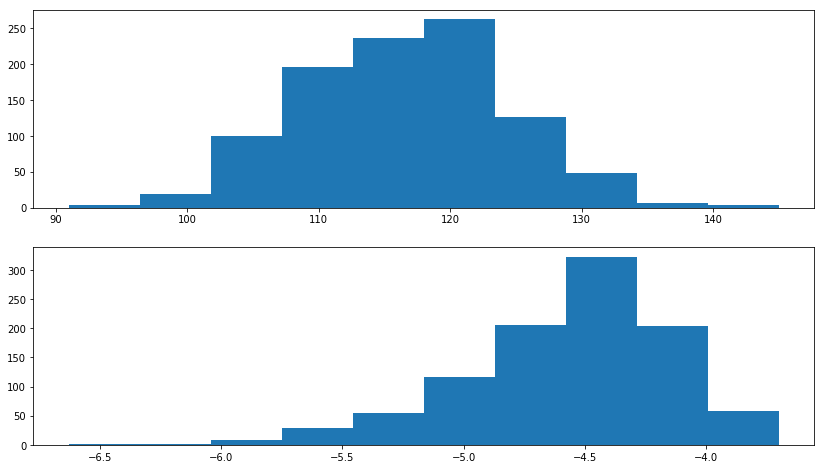

In [65]:
sigma = 0.25
percents = np.zeros(reps)
bs = np.zeros(reps)
for i in xrange(reps):
    mutations = original_individual + sigma * np.random.randn(N, d)

    evaluated = objective_function(mutations)
    better = mutations[evaluated > objective_function(original_individual)]
    percents[i] = better.shape[0]
    bs[i] = evaluated.min()
print '%d/%d were better' % (better.shape[0], N)
print 'best score: %f' % evaluated.min()

plt.figure(figsize=(14, 8))
plt.subplot('211')
plt.hist(percents)
plt.subplot('212')
plt.hist(bs)
plt.show()

WIDTH OF ELIPSE: 1.1106427262816643
HEIGHT OF ELIPSE: 0.99164980335746


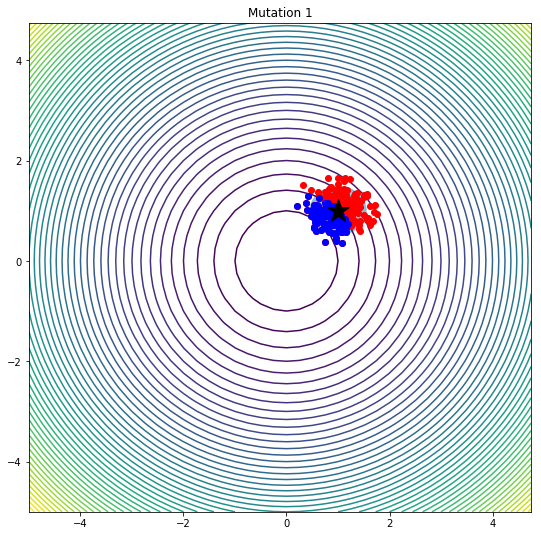

In [68]:
domain_X = np.arange(-5, 5, 0.25)
domain_Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(domain_X, domain_Y)
Z = - objective_function(np.vstack([X.ravel(), Y.ravel()]).T).reshape(X.shape[0], X.shape[1])

plt.figure(figsize=(9, 9))
plt.contour(X, Y, Z, 50)
plt.plot(mutations[:, 0], mutations[:, 1], 'ro')
plt.plot(better[:, 0], better[:, 1], 'bo')
plt.plot(original_individual[0, 0], original_individual[0, 1], 'k*', markersize=24)
plt.title('Mutation 1')
plot_point_cov(mutations, original_individual.T, alpha=0.5)
plt.show()

### Przykład 2:

$x_i = x_i + \varepsilon_i$, gdzie $\varepsilon_i$ ma rozkład normalny $\mathcal{N}(0, \sigma_i^2)$, zaś $\sigma_i$ może być różna dla różnych $i = 1, 2, \ldots, d$

115/250 were better
best score: -7.722472


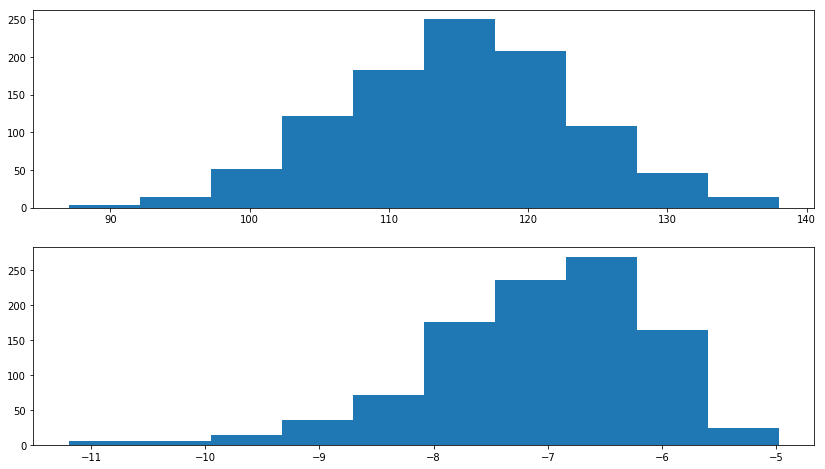

In [61]:
sigma = np.array([0.25, 0.5])
percents = np.zeros(reps)
bs = np.zeros(reps)
for i in xrange(reps):
    mutations = original_individual + sigma * np.random.randn(N, d)

    evaluated = objective_function(mutations)
    better = mutations[evaluated > objective_function(original_individual)]
    percents[i] = better.shape[0]
    bs[i] = evaluated.min()
print '%d/%d were better' % (better.shape[0], N)
print 'best score: %f' % evaluated.min()

plt.figure(figsize=(14, 8))
plt.subplot('211')
plt.hist(percents)
plt.subplot('212')
plt.hist(bs)
plt.show()

WIDTH OF ELIPSE: 1.929932107739368
HEIGHT OF ELIPSE: 1.0131545207193322


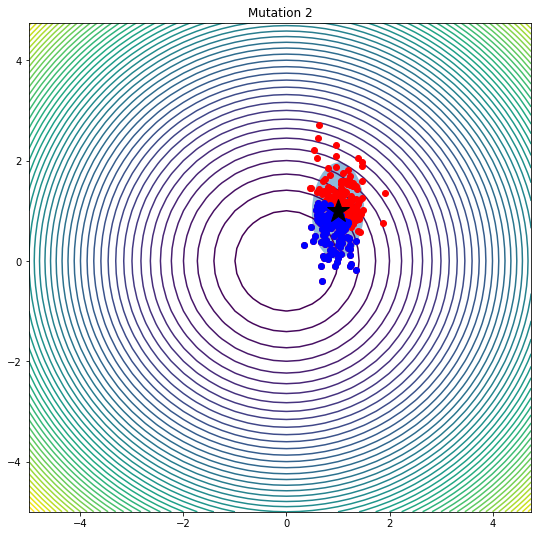

In [62]:
domain_X = np.arange(-5, 5, 0.25)
domain_Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(domain_X, domain_Y)
Z = - objective_function(np.vstack([X.ravel(), Y.ravel()]).T).reshape(X.shape[0], X.shape[1])

plt.figure(figsize=(9, 9))
plt.contour(X, Y, Z, 50)
plt.plot(mutations[:, 0], mutations[:, 1], 'ro')
plt.plot(better[:, 0], better[:, 1], 'bo')
plt.plot(original_individual[0, 0], original_individual[0, 1], 'k*', markersize=24)
plt.title('Mutation 2')
plot_point_cov(mutations, original_individual.T, alpha=0.5)
plt.show()

### Przykład 3:

$\mathbf{x} = \mathbf{x} + \boldsymbol{\varepsilon}$, gdzie $\boldsymbol{\varepsilon}$ ma wielowymiarowy rozkład normalny $\mathcal{N}(\mathbf{0}, \boldsymbol{\Sigma})$

111/250 were better
best score: -11.407084


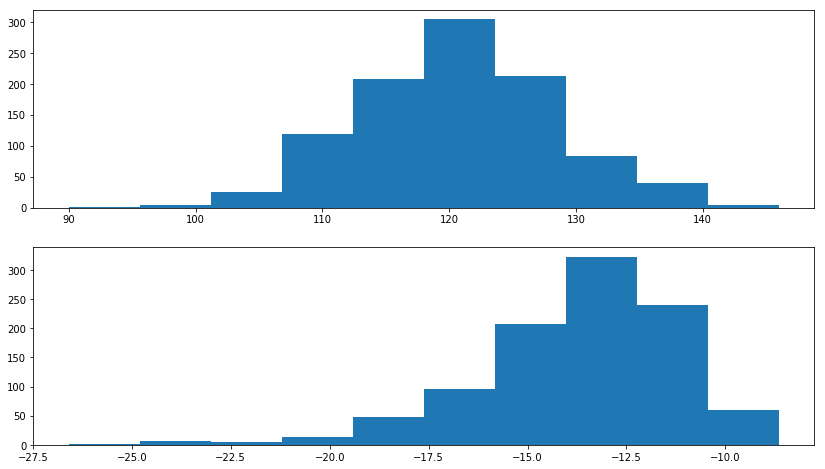

In [69]:
S = np.array([[0.25, 0.25],[0.25, 0.5]])

percents = np.zeros(reps)
bs = np.zeros(reps)
for i in xrange(reps):
    mutations = original_individual + np.dot(np.random.randn(N, d), np.linalg.cholesky(S).T)

    evaluated = objective_function(mutations)
    better = mutations[evaluated > objective_function(original_individual)]
    percents[i] = better.shape[0]
    bs[i] = evaluated.min()
print '%d/%d were better' % (better.shape[0], N)
print 'best score: %f' % evaluated.min()

plt.figure(figsize=(14, 8))
plt.subplot('211')
plt.hist(percents)
plt.subplot('212')
plt.hist(bs)
plt.show()

WIDTH OF ELIPSE: 3.2211674070858916
HEIGHT OF ELIPSE: 1.2075852269636753


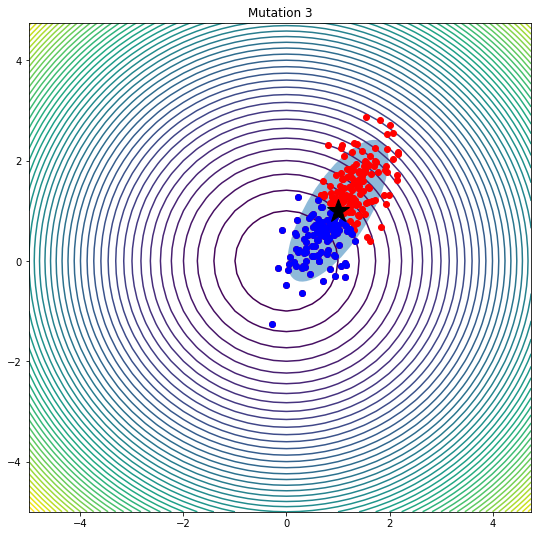

In [70]:
domain_X = np.arange(-5, 5, 0.25)
domain_Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(domain_X, domain_Y)
Z = - objective_function(np.vstack([X.ravel(), Y.ravel()]).T).reshape(X.shape[0], X.shape[1])

plt.figure(figsize=(9, 9))
plt.contour(X, Y, Z, 50)
plt.plot(mutations[:, 0], mutations[:, 1], 'ro')
plt.plot(better[:, 0], better[:, 1], 'bo')
plt.plot(original_individual[0, 0], original_individual[0, 1], 'k*', markersize=24)
plt.title('Mutation 3')
plot_point_cov(mutations, original_individual.T, alpha=0.5)
plt.show()